<a href="https://colab.research.google.com/github/Suhanip/Federated-Learning/blob/master/Fashion_MNIST_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion MNIST Dataset

##Approach1: Manually creating the workers and dividing the data

In [15]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [18]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [16]:
#loading data
train = pd.read_csv('/content/fashion-mnist_train.csv')

In [20]:
train_images.shape

(60000, 28, 28)

In [19]:
#splitting of data into 3 workers(10000 training each)
train1 = train_images[:10000]
train2 = train_images[10001:20001]
train3 = train_images[20002:30002]

In [21]:
len1 = len(train1)
len2 = len(train2)
len3 = len(train3)

In [28]:
y1 = train_labels[:10000]
y2 = train_labels[10001:20001]
y3 = train_labels[20002:30002]

<BarContainer object of 3 artists>

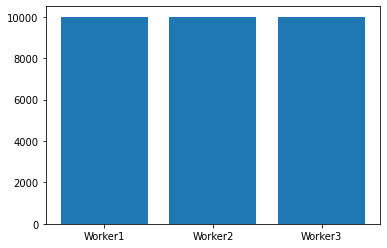

In [22]:
df = pd.Series(data=[len1, len2, len3],
               index=['Worker1', 'Worker2', 'Worker3'],
               name="DATA").rename_axis("Data set length", axis=0)

x = df.index
y = df.values

plt.bar(x, y)

In [25]:
# normalizing the input
train1 = train1/255.0
train2 = train2/255.0
train3 = train3/255.0

In [27]:
# reshaping images in 3 dimensions
train1 = train1.reshape(-1,28,28,1)
train2 = train2.reshape(-1,28,28,1)
train3 = train3.reshape(-1,28,28,1)

In [29]:
from sklearn.model_selection import train_test_split
random_seed = 2
x_train1, x_test1, y_train1, y_test1 = train_test_split(train1, y1, test_size=0.2, random_state=random_seed)
x_train2, x_test2, y_train2, y_test2 = train_test_split(train2, y2, test_size=0.2, random_state=random_seed)
x_train3, x_test3, y_train3, y_test3 = train_test_split(train3, y3, test_size=0.2, random_state=random_seed)

In [30]:
def MODEL1():
    model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
    ])
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    return model

In [31]:
#3 models for 3 workers
model1 = MODEL1()
model2 = MODEL1()
model3 = MODEL1()

Epoch 1/2
200/200 [==============================] - 1s 3ms/step - loss: 0.7993 - accuracy: 0.7236 - val_loss: 0.5319 - val_accuracy: 0.8175
Epoch 2/2
200/200 [==============================] - 0s 2ms/step - loss: 0.5293 - accuracy: 0.8183 - val_loss: 0.5306 - val_accuracy: 0.7981
Epoch 1/2
200/200 [==============================] - 0s 2ms/step - loss: 0.8164 - accuracy: 0.7120 - val_loss: 0.5995 - val_accuracy: 0.7850
Epoch 2/2
200/200 [==============================] - 0s 2ms/step - loss: 0.5374 - accuracy: 0.8081 - val_loss: 0.5045 - val_accuracy: 0.8275
Epoch 1/2
200/200 [==============================] - 1s 3ms/step - loss: 0.7938 - accuracy: 0.7209 - val_loss: 0.6070 - val_accuracy: 0.7831
Epoch 2/2
200/200 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.8241 - val_loss: 0.5130 - val_accuracy: 0.8256


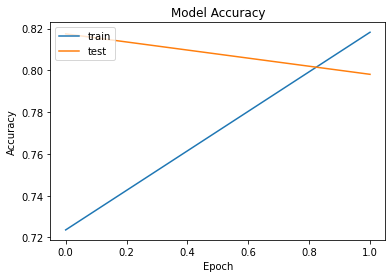

63/63 - 0s - loss: 0.5711 - accuracy: 0.7865


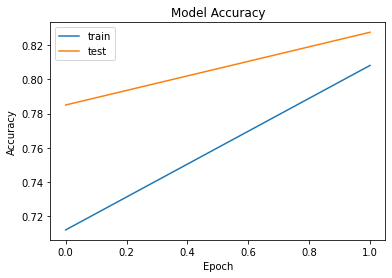

63/63 - 0s - loss: 0.5183 - accuracy: 0.8215


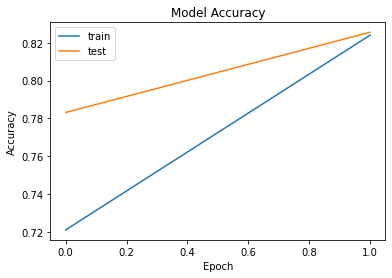

63/63 - 0s - loss: 0.4705 - accuracy: 0.8310


In [32]:
#training 3 models for 3 workers
for i in range(1):
    h1 = model1.fit(x_train1, y_train1, validation_split=0.2, epochs=2, verbose=1)
    h2 = model2.fit(x_train2, y_train2, validation_split=0.2, epochs=2, verbose=1)
    h3 = model3.fit(x_train3, y_train3, validation_split=0.2, epochs=2, verbose=1)
    
    plt.plot(h1.history['accuracy'])
    plt.plot(h1.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    model1.evaluate(x_test1,  y_test1, verbose=2)
    
    plt.plot(h2.history['accuracy'])
    plt.plot(h2.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    model2.evaluate(x_test2,  y_test2, verbose=2)
    
    plt.plot(h3.history['accuracy'])
    plt.plot(h3.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    model3.evaluate(x_test3,  y_test3, verbose=2)

In [33]:
for i in range(50):
    h1 = model1.fit(x_train1, y_train1, validation_split=0.2, epochs=1, verbose=0)
    h2 = model2.fit(x_train2, y_train2, validation_split=0.2, epochs=1, verbose=0)
    h3 = model3.fit(x_train3, y_train3, validation_split=0.2, epochs=1, verbose=0)
    
    #getting weights of each models
    wt1 = model1.get_weights()
    wt2 = model2.get_weights()
    wt3 = model3.get_weights()
    
    a = np.array(wt1)
    b = np.array(wt2)
    c = np.array(wt3)
    
    #mean of all the weights
    mean = (a+b+c)/3
    
    #model with new weights
    model1.set_weights(mean)
    model2.set_weights(mean)
    model3.set_weights(mean)

model1.evaluate(x_test1,  y_test1, verbose=2)
model2.evaluate(x_test2,  y_test2, verbose=2)
model3.evaluate(x_test3,  y_test3, verbose=2)

63/63 - 0s - loss: 0.3190 - accuracy: 0.8880
63/63 - 0s - loss: 0.3652 - accuracy: 0.8780
63/63 - 0s - loss: 0.3337 - accuracy: 0.8885


[0.33366522192955017, 0.8884999752044678]

In [34]:
#accuracy for new_model is 88.84%

##Approach2: Federated learning using Pytorch and Pysyft

###Importing libraries and creating workers

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import logging

# import Pysyft to help us to simulate federated leraning
!pip install syft
import syft as sy

# hook PyTorch to PySyft i.e. add extra functionalities to support Federated Learning
# and other private AI tools
hook = sy.TorchHook(torch) 

# we create two imaginary schools
westside_school = sy.VirtualWorker(hook, id="westside")
grapevine_high = sy.VirtualWorker(hook, id="grapevine")

###Defining the hyper_parameters such as batch_size,learning_rate etc

In [ ]:

# define the args
args = {
    'use_cuda' : True,
    'batch_size' : 64,
    'test_batch_size' : 1000,
    'lr' : 0.01,
    'log_interval' : 100,
    'epochs' : 10
}

# check to use GPU or not
use_cuda = args['use_cuda'] and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

###Simple CNN Model

In [ ]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, stride = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32,out_channels = 64, kernel_size = 3, stride = 1),
            nn.ReLU()
        )
        
        self.fc = nn.Sequential(
            nn.Linear(in_features=64*12*12, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=10),
        )
    
    def forward(self, x):
        x = self.conv(x)
        x = F.max_pool2d(x,2)
        x = x.view(-1, 64*12*12)
        x = self.fc(x)
        x = F.log_softmax(x, dim=1)
        return x

###SENDING DATA TO REMOTE WORKERS

Load the data first and then transform the data into a federated dataset using .federate() method. 
It does a couple of things:

*   It splits the dataset in two parts (which was also done by the torch Data Loader as well)
*   But the extra thing it does is it also sends this data across two remote workers, in this case the two schools.



then used this newly created federated dataset to iterate over remote batches during the training loop.

In [ ]:
federated_train_loader = sy.FederatedDataLoader(
    datasets.FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
    .federate((grapevine_high, westside_school)),
    batch_size=args['batch_size'], shuffle=True)

test_loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args['test_batch_size'], shuffle=True)

In [ ]:
for images,labels in federated_train_loader:
    print(images) # batch of images pointers
    print(labels) # batch of image labels pointers
    
    print(len(images)) # len function works on pointers as well
    print(len(labels))
    break

(Wrapper)>[PointerTensor | me:91718234201 -> grapevine:21636052621]
(Wrapper)>[PointerTensor | me:73961953267 -> grapevine:42421860582]
64
64


###Training and validating the model

Now each time train the model, that is needed to be sent to the right location for each batch by using .send() function

Then, all the operations are performed remotely with the same syntax like done in local PyTorch. When we're done, we get back the updated model using the .get() method.

In [ ]:
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()

    # iterate over federated data
    for batch_idx, (data, target) in enumerate(train_loader):

        # send the model to the remote location 
        model = model.send(data.location)

        # the same torch code that we are use to
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)

        # this loss is a ptr to the tensor loss 
        # at the remote location
        loss = F.nll_loss(output, target)

        # call backward() on the loss ptr,
        # that will send the command to call
        # backward on the actual loss tensor
        # present on the remote machine
        loss.backward()

        optimizer.step()

        # get back the updated model
        model.get()

        if batch_idx % args['log_interval'] == 0:

            # a thing to note is the variable loss was
            # also created at remote worker, so we need to
            # explicitly get it back
            loss = loss.get()

            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, 
                    batch_idx * args['batch_size'], # no of images done
                    len(train_loader) * args['batch_size'], # total images left
                    100. * batch_idx / len(train_loader), 
                    loss.item()
                )
            )

In [ ]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)

            # add losses together
            test_loss += F.nll_loss(output, target, reduction='sum').item() 

            # get the index of the max probability class
            pred = output.argmax(dim=1, keepdim=True)  
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=args['lr'])

logging.info("Starting training !!")

for epoch in range(1, args['epochs'] + 1):
        train(args, model, device, federated_train_loader, optimizer, epoch)
        test(model, device, test_loader)
    
# thats all we need to do XD

Train Epoch: 1 [0/60032 (0%)]	Loss: 2.296969
Train Epoch: 1 [6400/60032 (11%)]	Loss: 0.665887
Train Epoch: 1 [12800/60032 (21%)]	Loss: 0.776979
Train Epoch: 1 [19200/60032 (32%)]	Loss: 0.545363
Train Epoch: 1 [25600/60032 (43%)]	Loss: 0.636503
Train Epoch: 1 [32000/60032 (53%)]	Loss: 0.677906
Train Epoch: 1 [38400/60032 (64%)]	Loss: 0.638186
Train Epoch: 1 [44800/60032 (75%)]	Loss: 0.666836
Train Epoch: 1 [51200/60032 (85%)]	Loss: 0.465158
Train Epoch: 1 [57600/60032 (96%)]	Loss: 0.567458

Test set: Average loss: 0.5214, Accuracy: 8108/10000 (81%)

Train Epoch: 2 [0/60032 (0%)]	Loss: 0.571922
Train Epoch: 2 [6400/60032 (11%)]	Loss: 0.516779
Train Epoch: 2 [12800/60032 (21%)]	Loss: 0.592080
Train Epoch: 2 [19200/60032 (32%)]	Loss: 0.461282
Train Epoch: 2 [25600/60032 (43%)]	Loss: 0.464961
Train Epoch: 2 [32000/60032 (53%)]	Loss: 0.379698
Train Epoch: 2 [38400/60032 (64%)]	Loss: 0.496116
Train Epoch: 2 [44800/60032 (75%)]	Loss: 0.329194
Train Epoch: 2 [51200/60032 (85%)]	Loss: 0.374751
T

In [ ]:
#Accuracy for this model: 89%